###This model predicts the price of a house based on features like number of rooms, size in square feet and the age


###Step 1: Import the libraries

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


###Step 2:Load the dataset

In [7]:
df = pd.read_csv('/content/data.csv')
print(df.head())

                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    str

###Step 3: Select the features and the target

In [9]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'yr_built']]
y = df['price']

###Step 4: Splitting into training and testing

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

###Step 5: Train the model

In [11]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

###Step 6: Predictions

In [12]:
y_pred = model.predict(x_test)

###Step 7: Evaluate the model

In [13]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 990512244942.1538
R-squared: 0.028763249905176647


###Step 8: Visualization

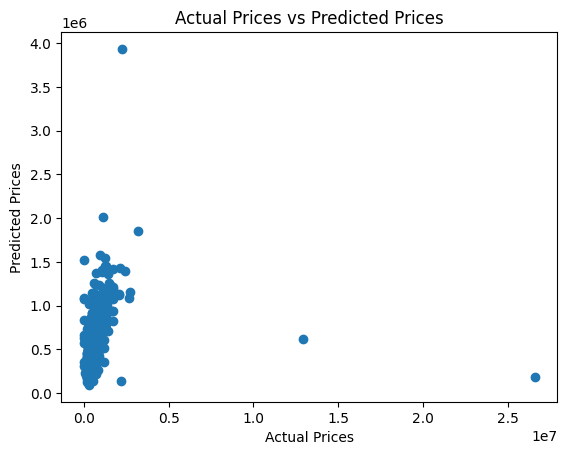

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()